# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [86]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [87]:
#please test this first before running it. don't want to lock yourself out.

# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'&units=metric&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json['coord']['lat']
        city_lng = city_json['coord']['lon']
        city_max_temp = city_json['main']['temp_max']
        city_humidity = city_json['main']['humidity']
        city_clouds = city_json['clouds']['all']
        city_wind = city_json['wind']['speed']
        city_country = city_json['sys']['country']
        city_date = city_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wickenburg
Processing Record 2 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | petrovsk
Processing Record 6 of Set 1 | belmonte
Processing Record 7 of Set 1 | kismayo
Processing Record 8 of Set 1 | masuguru
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | saugor
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | hadibu
Processing Record 18 of Set 1 | meizhou
Processing Record 19 of Set 1 | fort mcmurray
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | pacific grove
Processing Record 22 o

In [88]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [89]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wickenburg,33.9686,-112.7296,24.69,15,0,2.24,US,1715142120
1,udachny,66.4167,112.4000,-0.31,98,100,10.13,RU,1715142203
2,iqaluit,63.7506,-68.5145,-6.15,86,20,6.69,CA,1715142203
3,petrovsk,52.3064,45.3917,4.52,76,100,7.99,RU,1715142203
4,belmonte,-15.8631,-38.8828,25.05,82,22,2.68,BR,1715142203


In [90]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [91]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wickenburg,33.9686,-112.7296,24.69,15,0,2.24,US,1715142120
1,udachny,66.4167,112.4000,-0.31,98,100,10.13,RU,1715142203
2,iqaluit,63.7506,-68.5145,-6.15,86,20,6.69,CA,1715142203
3,petrovsk,52.3064,45.3917,4.52,76,100,7.99,RU,1715142203
4,belmonte,-15.8631,-38.8828,25.05,82,22,2.68,BR,1715142203


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

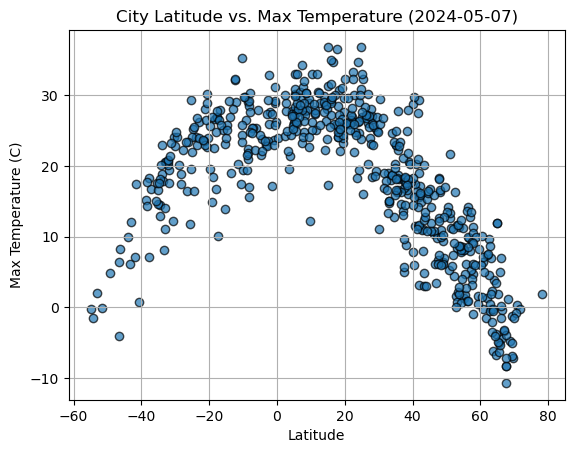

In [92]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.7, edgecolors='black')

# Incorporate the other graph properties
# Format the UNIX timestamp for the first row into YYYY-MM-DD format
# time.strftime() takes a tuple as second argument, so convert using time.localtime()
run_date = time.strftime('%Y-%m-%d', time.localtime(city_data_df['Date'][0]))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Max Temperature ({run_date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

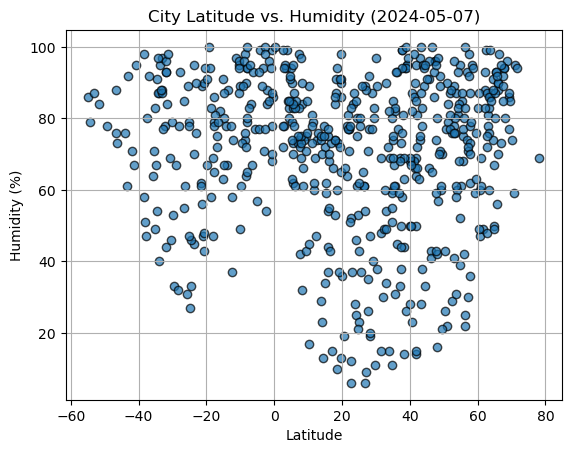

In [94]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.7, edgecolors='black')

# Incorporate the other graph properties
# Format the UNIX timestamp for the first row into YYYY-MM-DD format
# time.strftime() takes a tuple as second argument, so convert using time.localtime()
run_date = time.strftime('%Y-%m-%d', time.localtime(city_data_df['Date'][0]))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({run_date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

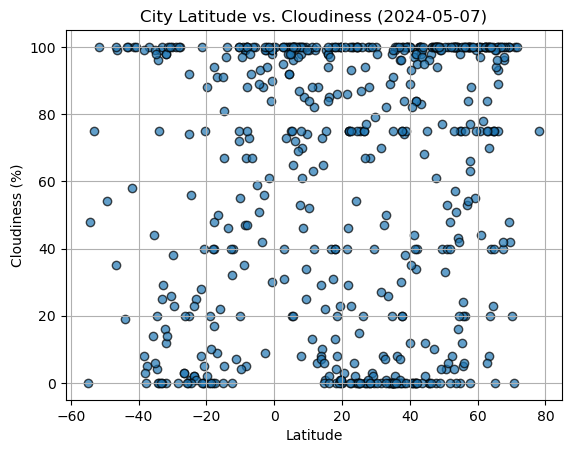

In [95]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.7, edgecolors='black')

# Incorporate the other graph properties
# Format the UNIX timestamp for the first row into YYYY-MM-DD format
# time.strftime() takes a tuple as second argument, so convert using time.localtime()
run_date = time.strftime('%Y-%m-%d', time.localtime(city_data_df['Date'][0]))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({run_date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

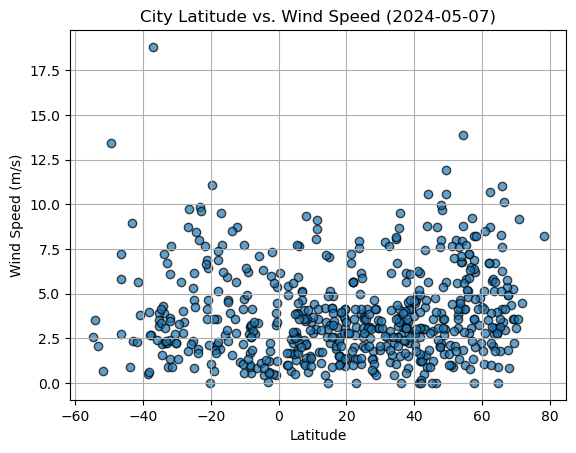

In [96]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.7, edgecolors='black')

# Incorporate the other graph properties
# Format the UNIX timestamp for the first row into YYYY-MM-DD format
# time.strftime() takes a tuple as second argument, so convert using time.localtime()
run_date = time.strftime('%Y-%m-%d', time.localtime(city_data_df['Date'][0]))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({run_date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [97]:
# Define a function to create Linear Regression plots
# this will plot the linear regression line given Series of x_values and y_values
# also annotates the equation using tuple xy (x and y locations)
# returns r-value (correlation)
def plot_linregress(x_values, y_values, x_label, y_label):
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (min(x_values), min(y_values)),fontsize=18,color="red")
    # print correlation
    print(f'The r-value is: {abs(st.pearsonr(x_values, y_values)[0])}')

In [98]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wickenburg,33.9686,-112.7296,24.69,15,0,2.24,US,1715142120
1,udachny,66.4167,112.4000,-0.31,98,100,10.13,RU,1715142203
2,iqaluit,63.7506,-68.5145,-6.15,86,20,6.69,CA,1715142203
3,petrovsk,52.3064,45.3917,4.52,76,100,7.99,RU,1715142203
9,hawaiian paradise park,19.5933,-154.9731,23.26,86,100,3.09,US,1715142204


In [99]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,belmonte,-15.8631,-38.8828,25.05,82,22,2.68,BR,1715142203
5,kismayo,-0.3582,42.5454,26.23,86,100,4.50,SO,1715142203
6,masuguru,-11.3667,38.4167,20.25,97,7,1.15,TZ,1715142204
7,port-aux-francais,-49.3500,70.2167,4.90,78,54,13.43,TF,1715142204
8,invercargill,-46.4000,168.3500,8.34,73,99,5.81,NZ,1715142088


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8813053287258347


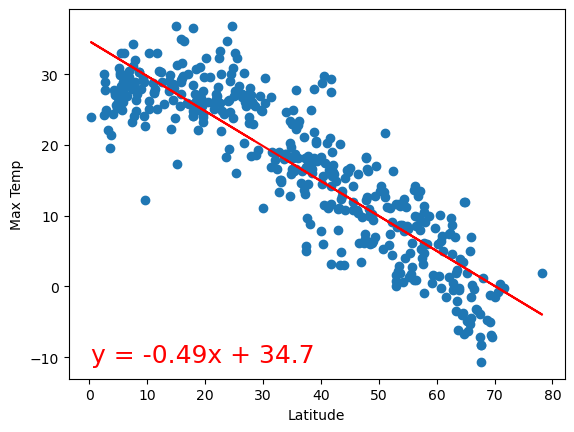

In [100]:
# Linear regression on Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

The r-value is: 0.7278685484320384


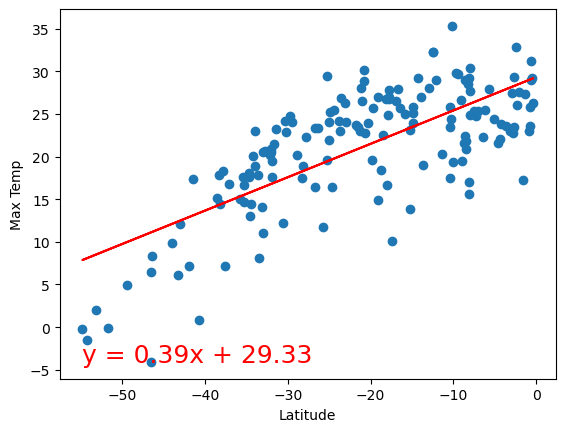

In [101]:
# Linear regression on Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** Pearson's Correlation value (r-value) is >0.7 showing a strong correlation between Latitude and Max Temperatures - specifically that the Max Temp increases as Latitude reaches 0. This makes sense because 0 degrees Latitude marks the equator which receives more direct sunlight than other parts of the Earth.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10986561634860198


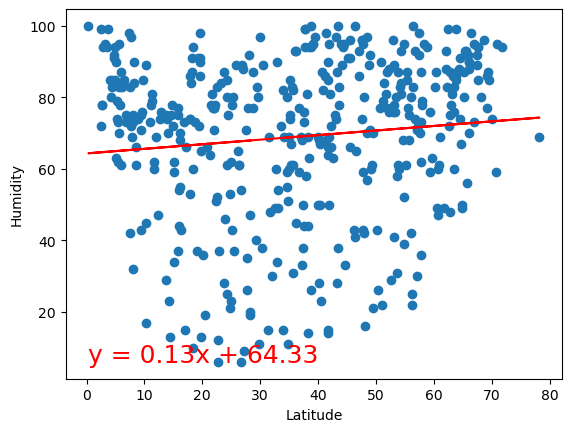

In [102]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 0.1493301386287776


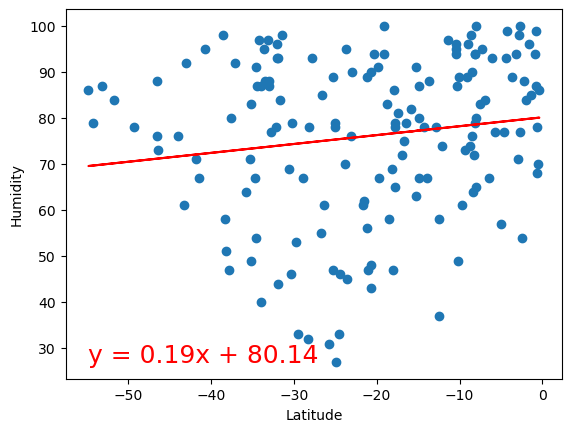

In [103]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** Pearson's Correlation value (r-value) is < 0.3 showing weak/no correlation between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06336405952673818


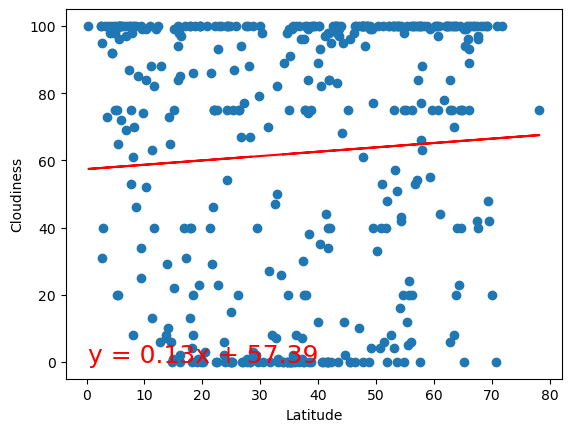

In [104]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.20553322429474172


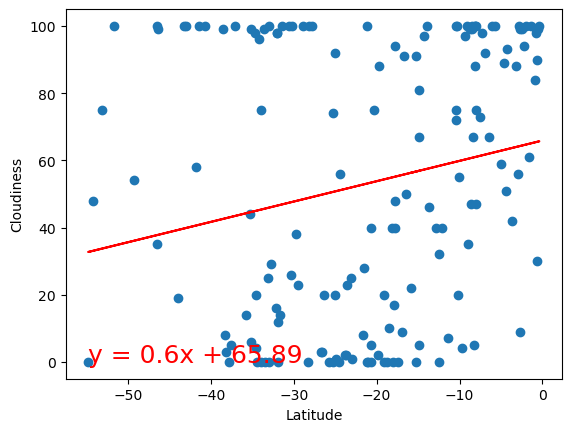

In [105]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** Pearson's Correlation value (r-value) is < 0.3 showing weak/no correlation between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2298568889841408


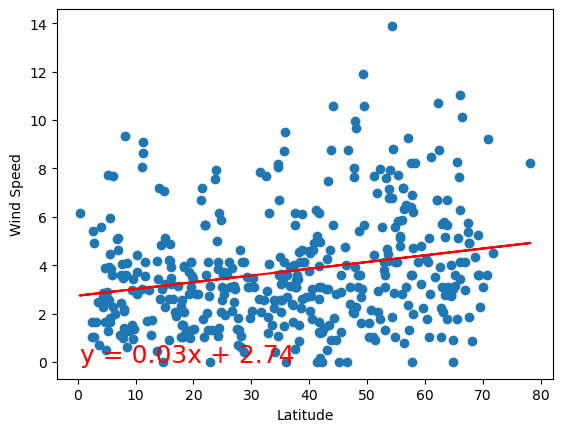

In [106]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: 0.13584290835197427


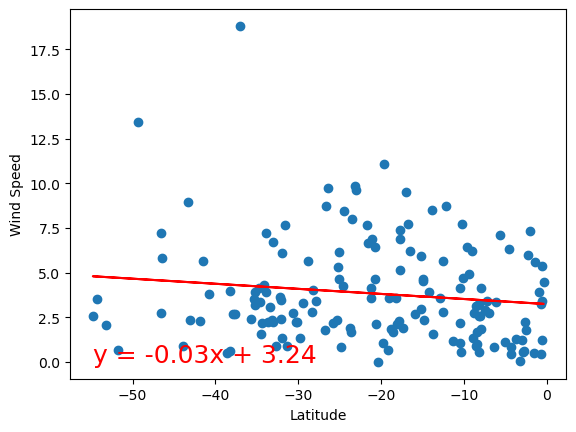

In [107]:
# Southern Hemisphere
correlation = plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** Pearson's Correlation value (r-value) is < 0.3 showing weak/no correlation between Latitude and Wind Speed.